# IBTrACS Dataset Getting Started
As mentioned on the NOAA website:
> The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centres, as well as other organizations and individuals from around the world.  

More info about this dataset can be found on the [projects home page](https://www.ncei.noaa.gov/products/international-best-track-archive).

To get started with the dataset, we can first load it and check out it's dimensions, coordinates and variables.

In [1]:
import clouddrift as cd

ds = cd.datasets.ibtracs("v04r01", "LAST_3_YEARS", "/home/ksantana/.clouddrift/tmp")
ds

https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/netcdf/IBTrACS.last3years.v04r01.nc: 100%|██████████| 1.45k/1.45k [00:01<00:00, 1.41MB/s]
Filling the Ragged Array: 100%|██████████████| 380/380 [00:02<00:00, 133.40it/s]


<xarray.Dataset> Size: 18MB
Dimensions:           (storm: 380, obs: 22055, quadrant: 4)
Coordinates:
    id                (storm) int64 3kB ...
    time              (obs) datetime64[ns] 176kB ...
Dimensions without coordinates: storm, obs, quadrant
Data variables: (12/161)
    numobs            (storm) int64 3kB ...
    sid               (storm) |S13 5kB ...
    season            (storm) float32 2kB ...
    number            (storm) int16 760B ...
    name              (storm) |S128 49kB ...
    source_usa        (storm) |S128 49kB ...
    ...                ...
    usa_seahgt        (obs) float32 88kB ...
    usa_searad        (obs, quadrant) float32 353kB ...
    storm_speed       (obs) float32 88kB ...
    storm_dir         (obs) float32 88kB ...
    lat               (obs) float32 88kB ...
    lon               (obs) float32 88kB ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Thu Oct 17 05:37:12 2024: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

Now That we have the data, let's select a small subset of it we can plot. For now we can select all the cyclones for this year (2024).

In [2]:
import numpy as np

# Select the data for the year 2022 only by using the ragged.subset method
year = 2024
ks = cd.ragged.subset(
    ds,
    {"time": (np.datetime64(f"{year}-01-01"), np.datetime64(f"{year}-12-31"))},
    row_dim_name="storm",
    rowsize_var_name="numobs"
)
ds

<xarray.Dataset> Size: 18MB
Dimensions:           (storm: 380, obs: 22055, quadrant: 4)
Coordinates:
    id                (storm) int64 3kB 0 1 2 3 4 5 ... 374 375 376 377 378 379
    time              (obs) datetime64[ns] 176kB 2021-01-01T00:00:00.00003993...
Dimensions without coordinates: storm, obs, quadrant
Data variables: (12/161)
    numobs            (storm) int64 3kB 27 45 129 71 35 43 ... 103 31 33 55 35
    sid               (storm) |S13 5kB ...
    season            (storm) float32 2kB ...
    number            (storm) int16 760B ...
    name              (storm) |S128 49kB ...
    source_usa        (storm) |S128 49kB ...
    ...                ...
    usa_seahgt        (obs) float32 88kB ...
    usa_searad        (obs, quadrant) float32 353kB ...
    storm_speed       (obs) float32 88kB ...
    storm_dir         (obs) float32 88kB ...
    lat               (obs) float32 88kB ...
    lon               (obs) float32 88kB ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Thu Oct 17 05:37:12 2024: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

Now that we have selected the data were interested in, lets go ahead and plot it! 

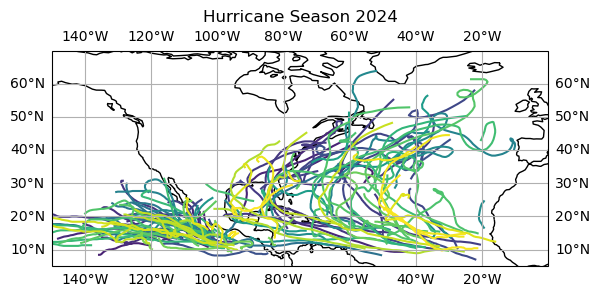

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# make figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
hl = cd.plotting.plot_ragged(
    ax,
    ds.lon,
    ds.lat,
    ds.numobs,
    transform=ccrs.PlateCarree(),
)
ax.set_extent([-150, 0, 5, 70], crs=ccrs.PlateCarree())
ax.set_title(f"Hurricane Season {year}")
ax.coastlines()
ax.gridlines(draw_labels=True)